## Analyzing the 'clean_data.csv'

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading clean_data.csv into dataframe
df = pd.read_csv('clean_data.csv')

## Checking for duplicated rows

In [3]:
# Checking for duplicated rows
df.duplicated().sum()

0

#### There are no duplicated rows as 'ID' column is unique. But it can be seen from the data that there are so many same re- entries for same car with different 'ID'. Hence it is better to drop 'ID' column to remove actually duplicated rows.

In [4]:
df.head()

,ID,REGION,PRICE,YEAR,MANUFACTURER,MODEL,CONDITION,CYLINDERS,FUEL,ODOMETER,TITLE_STATUS,TRANSMISSION,VIN,DRIVE,SIZE,TYPE,PAINT_COLOR,STATE,POSTING_YEAR
0,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,3GTP1VEC4EG551563,Not_mentioned,Not_mentioned,pickup,white,al,2021
1,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,1GCSCSE06AZ123805,Not_mentioned,Not_mentioned,pickup,blue,al,2021
2,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,3GCPWCED5LG130317,Not_mentioned,Not_mentioned,pickup,red,al,2021
3,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,5TFRM5F17HX120972,Not_mentioned,Not_mentioned,pickup,red,al,2021
4,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,Not_mentioned,rwd,full-size,truck,black,al,2021


In [5]:
# Dropping 'ID' column
df.drop('ID',axis=1,inplace=True)

In [6]:
df.head()

,REGION,PRICE,YEAR,MANUFACTURER,MODEL,CONDITION,CYLINDERS,FUEL,ODOMETER,TITLE_STATUS,TRANSMISSION,VIN,DRIVE,SIZE,TYPE,PAINT_COLOR,STATE,POSTING_YEAR
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,3GTP1VEC4EG551563,Not_mentioned,Not_mentioned,pickup,white,al,2021
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,1GCSCSE06AZ123805,Not_mentioned,Not_mentioned,pickup,blue,al,2021
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,3GCPWCED5LG130317,Not_mentioned,Not_mentioned,pickup,red,al,2021
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,5TFRM5F17HX120972,Not_mentioned,Not_mentioned,pickup,red,al,2021
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,Not_mentioned,rwd,full-size,truck,black,al,2021


In [7]:
# Getting total duplicated rows
df.duplicated().sum()

46910

In [8]:
# Dropping duplicated rows
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321061 entries, 0 to 367970
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REGION        321061 non-null  object
 1   PRICE         321061 non-null  int64 
 2   YEAR          321061 non-null  int64 
 3   MANUFACTURER  321061 non-null  object
 4   MODEL         321061 non-null  object
 5   CONDITION     321061 non-null  object
 6   CYLINDERS     321061 non-null  object
 7   FUEL          321061 non-null  object
 8   ODOMETER      321061 non-null  int64 
 9   TITLE_STATUS  321061 non-null  object
 10  TRANSMISSION  321061 non-null  object
 11  VIN           321061 non-null  object
 12  DRIVE         321061 non-null  object
 13  SIZE          321061 non-null  object
 14  TYPE          321061 non-null  object
 15  PAINT_COLOR   321061 non-null  object
 16  STATE         321061 non-null  object
 17  POSTING_YEAR  321061 non-null  int64 
dtypes: int64(4), object(14)


In [11]:
# Dropping 'POSTING_YEAR' column as all vehicles posted their adds in same year
df.drop(['POSTING_YEAR'], axis = 1, inplace = True)

In [12]:
# Saving the clean data after removing 'ID' column and 'POSTING_YEAR' column in 'final_clean_data.csv'
df.to_csv('final_clean_data.csv', index = False)

## Analysis based on 'YEAR' of registration column

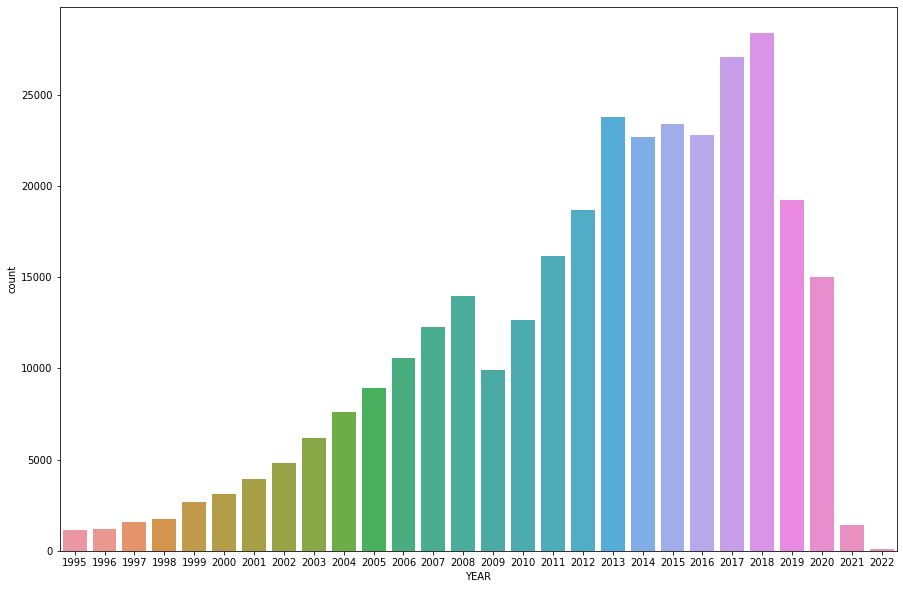

In [13]:
# Plotting countplot for Distribution of vehicles based on 'YEAR' of registration
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.countplot( x = 'YEAR', data=df)
plt.show()

#### Conclusion: From the above countplot we can conclude that year 2018 has the maximum cars registered followed by year 2017 and also trend shows most cars registered are in years between 2013 and 2018.

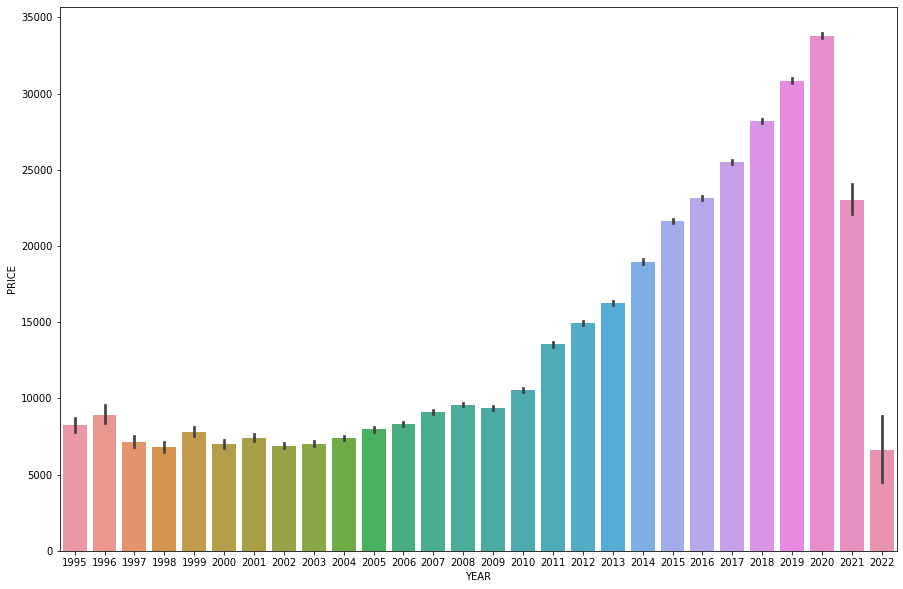

In [14]:
# Plotting barplot for 'PRICE' of vehicles based on 'YEAR' of Registration
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot( x = 'YEAR', y = 'PRICE', data=df)
plt.show()

#### Conclusion: According to the above barplot maximum price are of the vehicles which were registered in year 2020 followed by 2019. There is a clear uptrend from year 2011 to year 2020 in terms of average prices of vehicles.

<AxesSubplot:xlabel='PRICE', ylabel='YEAR'>

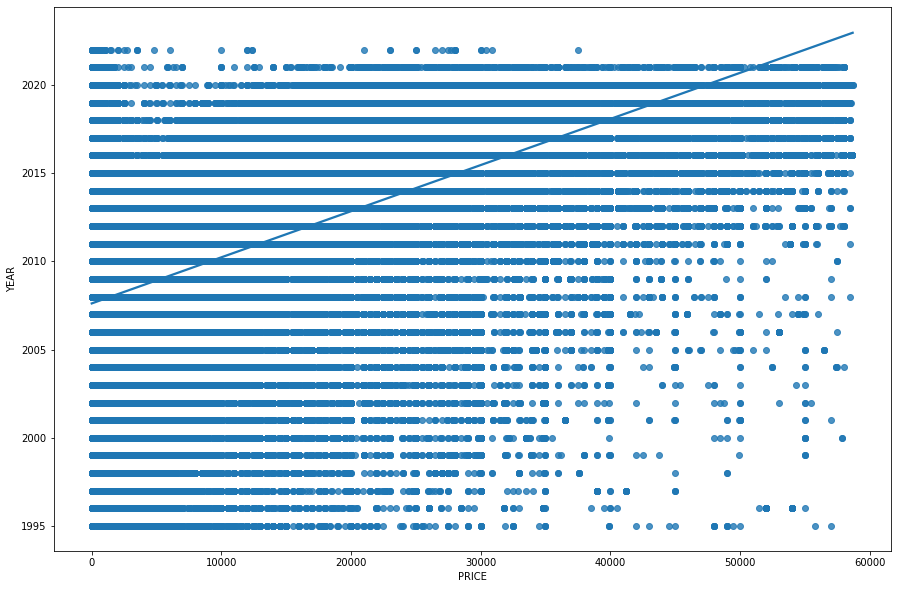

In [15]:
# Plotting regplot to see relation between 'PRICE' and 'YEAR' of manufacturing of vehicles
sns.regplot(x=df['PRICE'], y=df['YEAR'])

#### Conclusion: The above regplot shows the clear correlation between year of registration and price of vehicles

## Analysis based on 'STATE' of vehicle

In [16]:
# Getting name of all states
df['STATE'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

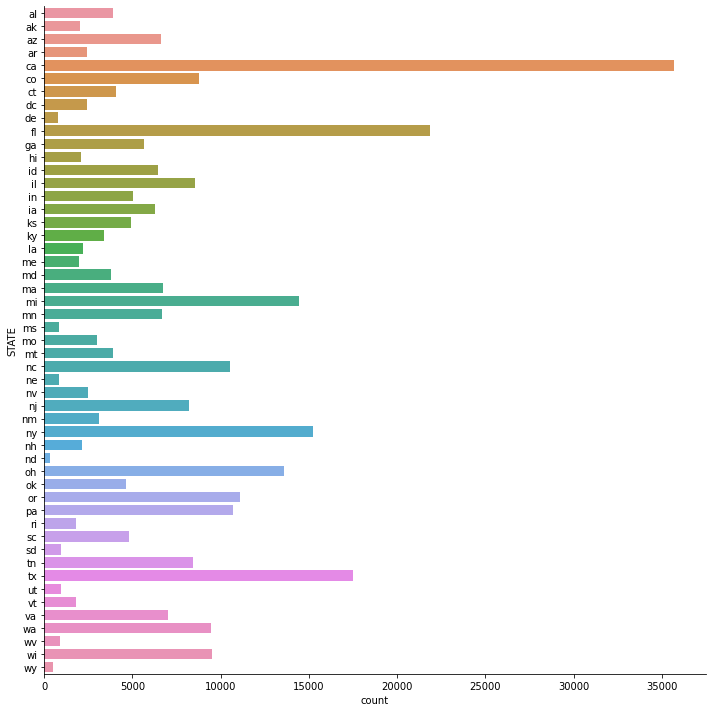

In [17]:
# Plotting catplot to see distribution of vehicles among 'STATES'
sns.catplot(y='STATE', data=df, kind='count', height = 10)

#### Conclusion: Maximum number of vehicles registered are from California(ca) state followed by Florida.

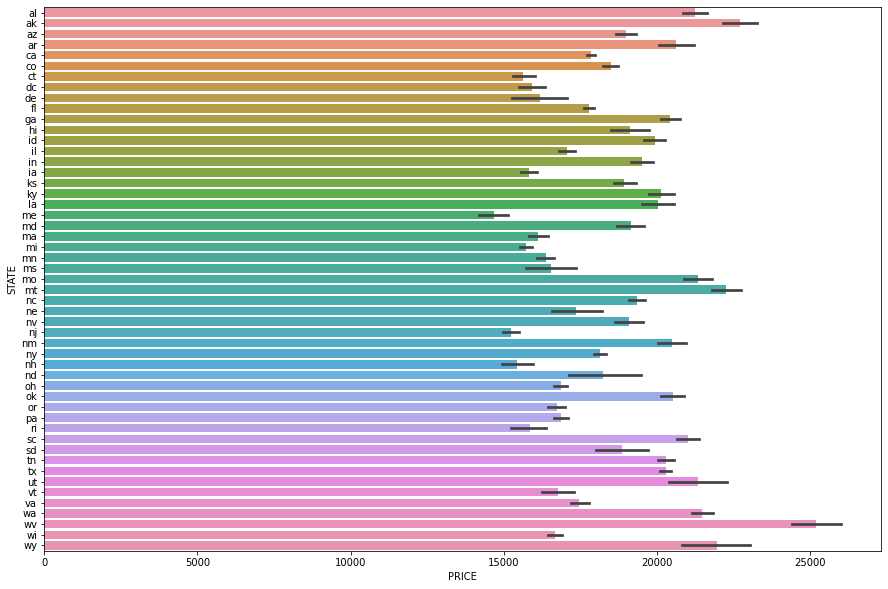

In [18]:
# Plotting barplot for 'STATE' of vehicles based on average 'PRICE' of vehicle
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'PRICE', y = 'STATE', data=df)
plt.show()

#### Conclusion: Above barplot shows that state Wisconsin(wi) has vehicles with maximum price range.

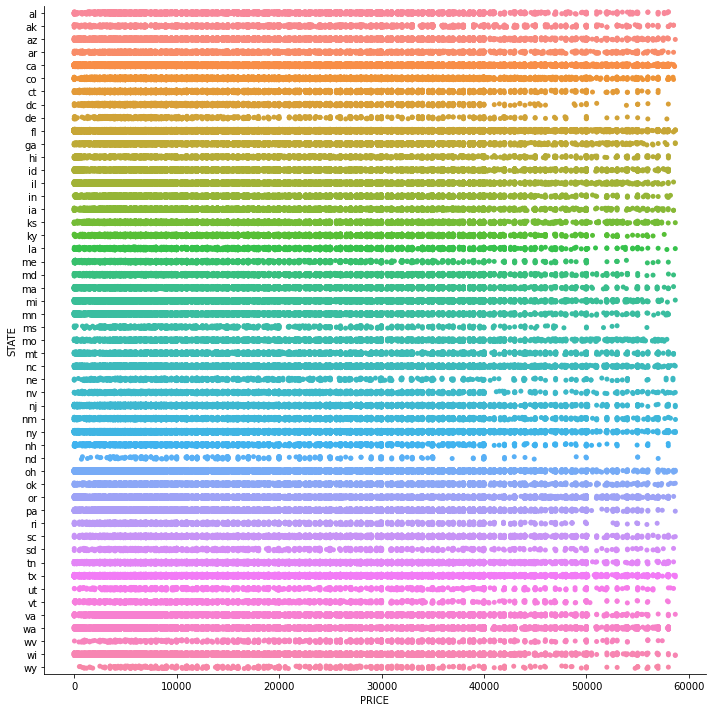

In [19]:
# Plotting catplot for 'STATE' of vehicles based on 'PRICE' of vehicles to see how they are distributed
sns.catplot(x = 'PRICE', y='STATE', data=df, height = 10)

#### Conclusion: From the above catplot, it can be roughly assumed that states like California(ca) and Florida(fl) have vehicles distributed in whole price range almost evenly

## Analysis based on 'MANUFACTURER' of vehicle

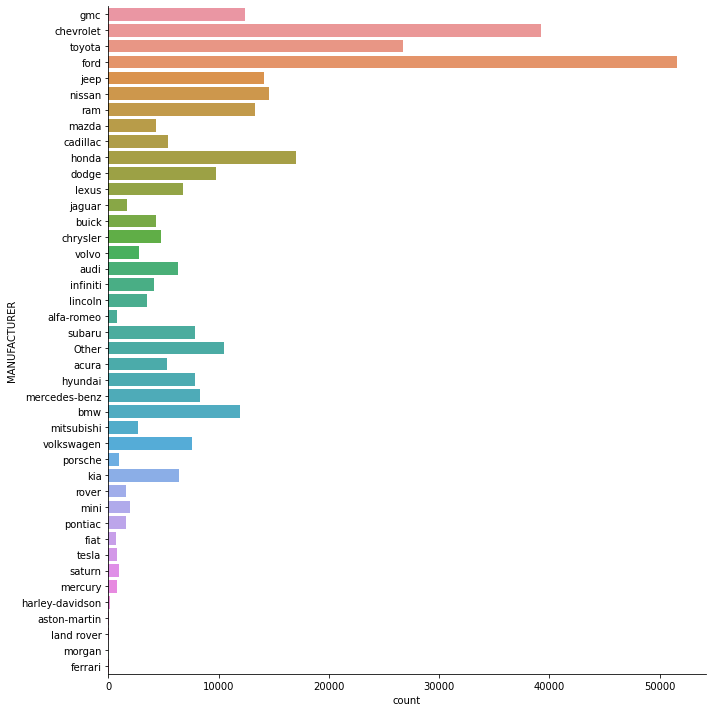

In [20]:
# Plotting catplot to see the distribution of vehicles according to 'MANUFACTURER'
sns.catplot(y='MANUFACTURER', data=df, kind='count', height = 10)

#### Conclusion: Maximum number of vehicles are of manufacturer Ford followed by Chevrolet and Toyota. This also showcases their mass production abilities.

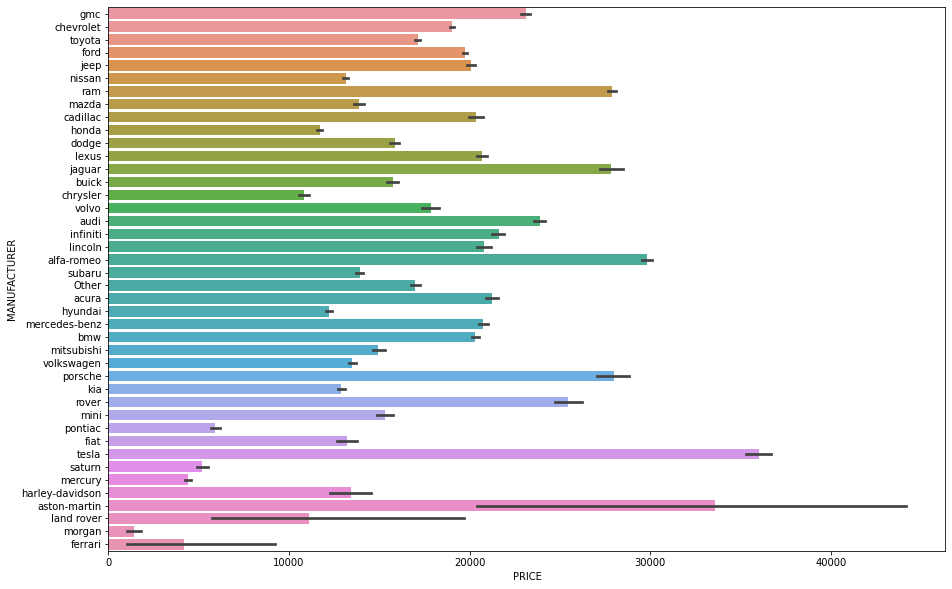

In [21]:
# Plotting barplot for 'MANUFACTURER' of vehicles based on average 'PRICE' of vehicles
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'PRICE', y = 'MANUFACTURER', data=df)
plt.show()

#### Conclusion: Price-wise Tesla is most expensive in resale market followed by Aston-martin. People are valuing more to the Premium EV brand rather than Other Premium luxury brand. Least value is shown by morgan manufacturer.

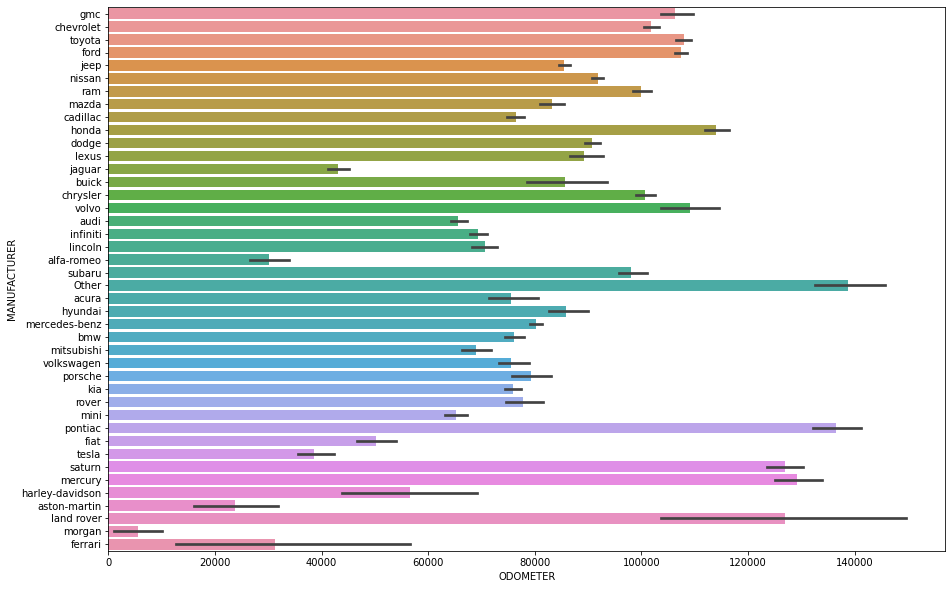

In [22]:
# Plotting barplot for 'MANUFACTURER' of vehicles based on average 'ODOMETER' values
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'ODOMETER', y = 'MANUFACTURER', data=df)
plt.show()

#### Conclusion: Above barplot shows that cars of manufacturer Pontiac, Mercury, Land-Rover and Saturn are driven many more miles before listing it for resale.

## Analysis based on 'TRANSMISSION' of vehicle

<AxesSubplot:xlabel='TRANSMISSION', ylabel='count'>

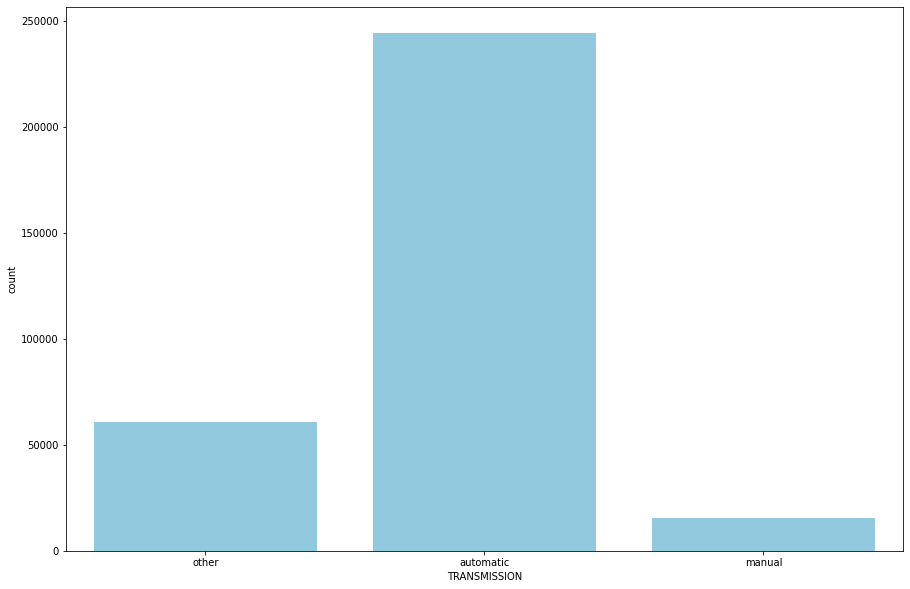

In [23]:
# Plotting countplot to see distribution among 'TRANSMISSION'
sns.countplot(x= 'TRANSMISSION', data = df, color = 'Skyblue')

#### Conclusion: Maximum vehicles for resale are of automatic transmission.

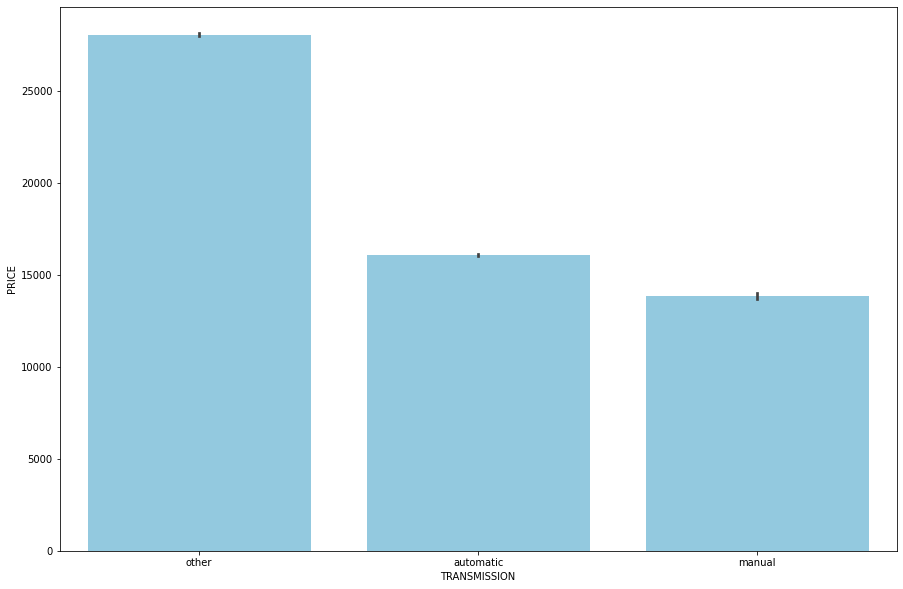

In [24]:
# Plotting barplot for 'TRANSMISSION' of vehicles based on average 'PRICE' of vehicles
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'TRANSMISSION', y = 'PRICE', data=df, color = 'Skyblue')
plt.show()

#### Conclusion: Pricing of vehicles with automatic transmission is slightly higher than vehicles with manual transmission.

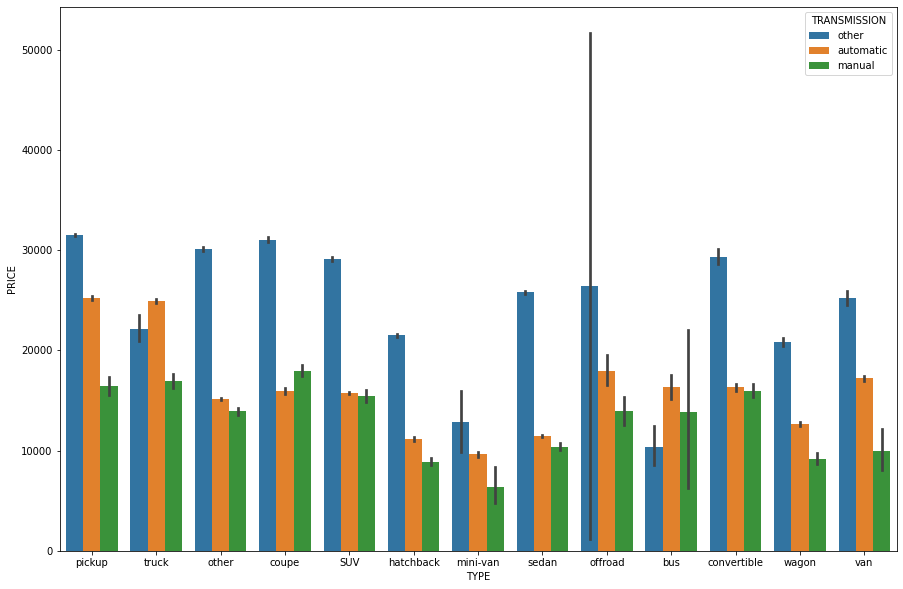

In [25]:
# Plotting barplot to see distribution of average 'PRICE' of vehicles according to 'TYPE' and 'TRANSMISSION' of vehicles
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'TYPE', y = 'PRICE', hue = 'TRANSMISSION', data=df)
plt.show()

#### Conclusion: Almost all type of vehicles with automatic transmission are priced higher than their respective manual transmission vehicles except coupe type of vehicle.

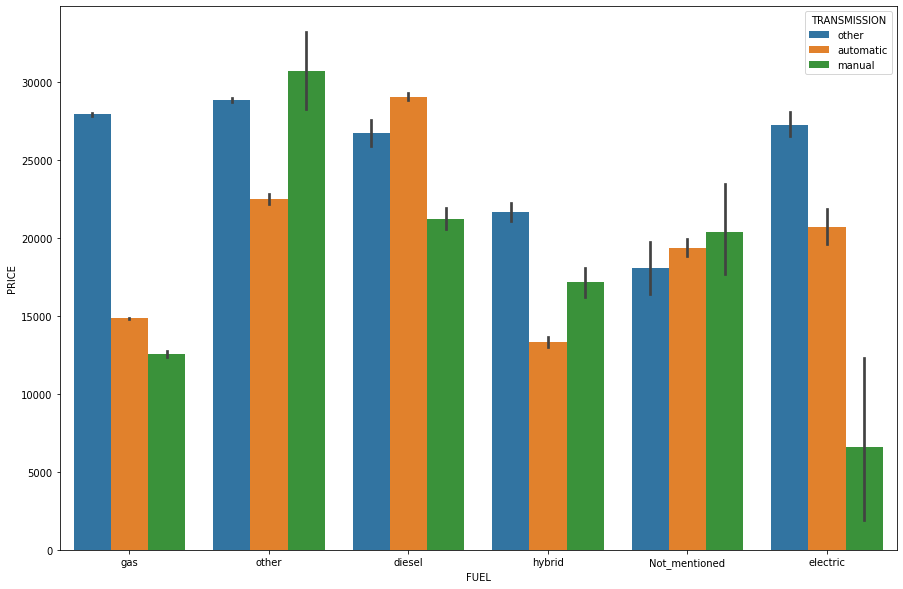

In [26]:
# Plotting barplot to see distribution of average 'PRICE' of vehicles according to 'FUEL' and 'TRANSMISSION' of vehicles
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'FUEL', y = 'PRICE', hue = 'TRANSMISSION', data=df)
plt.show()

#### Conclusion: Cars running with hybrid fuel with manual transmission are more priced than with automatic transmission. In all other different mentioned fuel types, cars with automatic transmission are expensive than cars with manual transmission.

## Analysis based on 'CONDITION' of vehicle

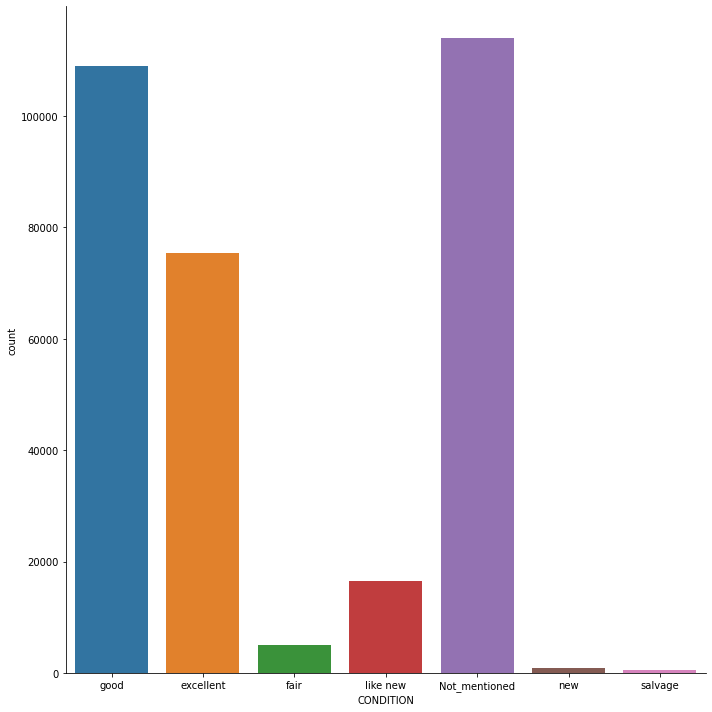

In [27]:
# Plotting catplot for 'CONDITION' of vehicles based on 'COUNT' of vehicle
sns.catplot(x='CONDITION', data=df, height=10, kind='count')
plt.show()

#### Conclusion: Maximum cars registered for resale are with good condition followed by excellent condition.

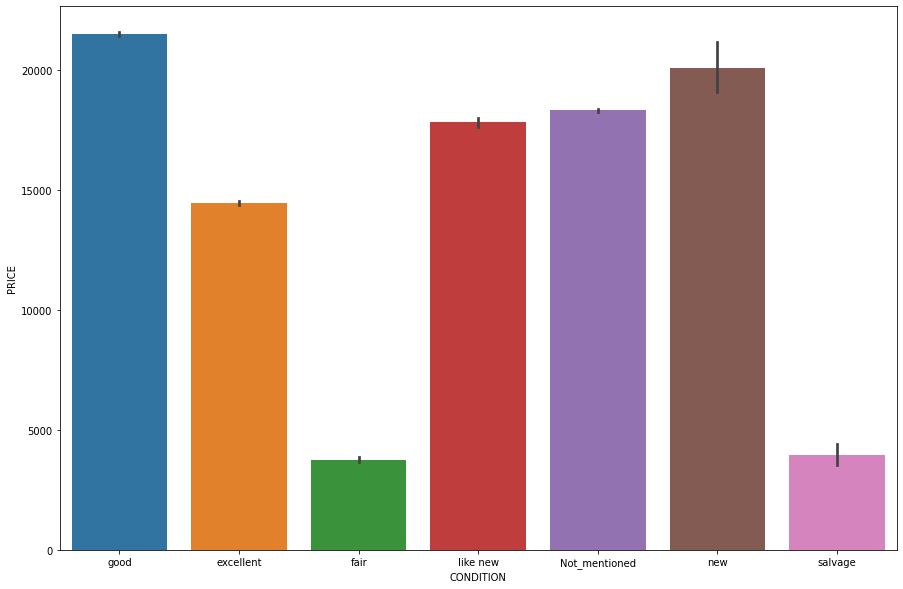

In [28]:
# Plotting barplot for 'CONDITION' of vehicles based on average 'PRICE' of vehicle
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'CONDITION', y = 'PRICE', data = df)
plt.show()

#### Conclusion: Cars with good condition are highly priced than others.

## Analysis based on 'PAINT_COLOR' of vehicle

In [29]:
# Creating variables to give input to pie chart
paint_values= df['PAINT_COLOR'].value_counts().values
paint_labels= df['PAINT_COLOR'].value_counts().index

([<matplotlib.patches.Wedge at 0x26cbd950040>,
 [Text(0.6835185610802776, 0.8618598358542687, 'Not_mentioned'),
  Text(-0.8154389366011493, 0.7382813424940299, 'white'),
  Text(-1.0312062831933864, -0.38290155588934577, 'black'),
  Text(-0.41743495434398675, -1.017717081949514, 'silver'),
  Text(0.20697916659389468, -1.0803516208143056, 'blue'),
  Text(0.6735115992988395, -0.869702320112991, 'red'),
  Text(0.9686596573668991, -0.5212470318283278, 'grey'),
  Text(1.065068215651389, -0.2750085380659416, 'green'),
  Text(1.0878892773869584, -0.16277874599124245, 'brown'),
  Text(1.0986737852440116, -0.053999200157000375, 'custom')],
 [Text(0.3728283060437878, 0.4701053650114192, '28.66%'),
  Text(-0.44478487450971776, 0.4026989140876526, '19.27%'),
  Text(-0.5624761544691197, -0.2088553941214613, '15.47%'),
  Text(-0.2276917932785382, -0.5551184083360985, '10.82%'),
  Text(0.11289772723303344, -0.5892827022623484, '7.59%'),
  Text(0.36736996325391247, -0.47438308369799503, '7.35%'),
  Tex

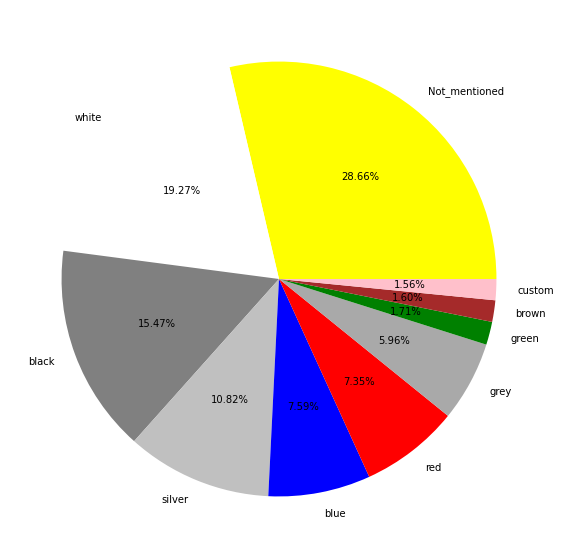

In [30]:
# Plotting pie chart for distribution percentage based on top 10 vehicle colors
colors = ['Yellow', 'White', 'Grey', 'Silver', 'Blue', 'Red', 'Darkgrey', 'Green', 'Brown', 'Pink']
plt.pie(paint_values[:10], labels = paint_labels[:10], colors = colors, autopct='%1.2f%%')

#### Conclusion: Maximum cars registered are of white color followed by cars with black and silver color.

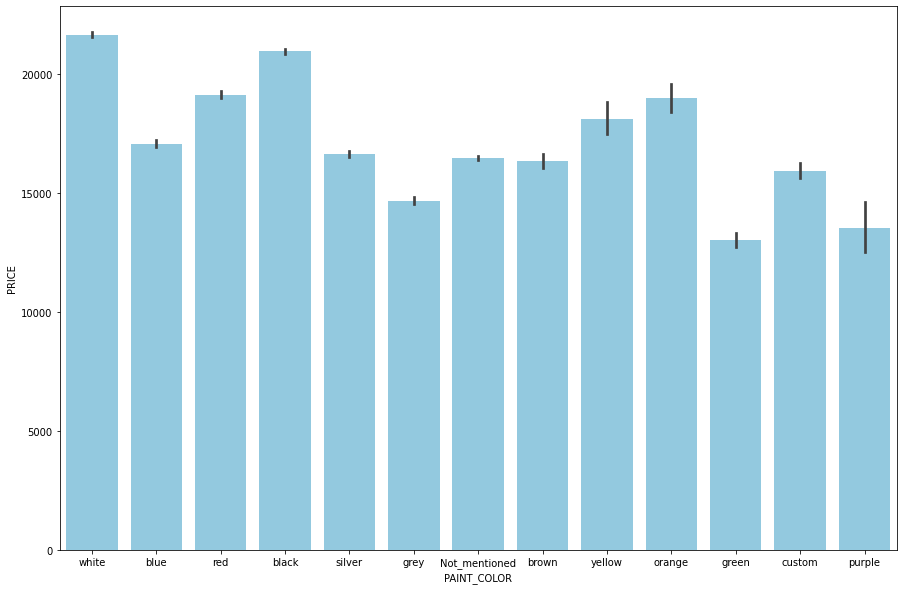

In [31]:
# Plotting barplot for 'PAINT_COLOR' of vehicles based on average 'PRICE' of vehicles
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'PAINT_COLOR', y = 'PRICE', data=df, color = 'Skyblue')
plt.show()

#### Conclusion: White cars are priced at top followed by black cars.